# MNIST 손글씨 숫자 분류

케라스와 텐서플로우를 사용한 딥러닝 입문 예제

- 케라스: 텐서플로우 설치시 자동설치 (텐서플로우 내부에 편입)
- 파이토치: LLM 개발자들이 주로 사용하는 별도 프레임워크

## 라이브러리 임포트

In [ ]:
import tensorflow as tf
from tensorflow import keras

# model => 학습된 데이타 = 신경망 = 네트웍 : 동일한 의미로 쓰인다.
# 심층신경망: 신경망 레이어를 겹겹이 쌓았다.
from tensorflow.keras.models import Sequential

# layers.Dense => 겹겹히 쌓으면 학습이 잘 되는데 너무 쌓으면 과대적합이 됨.
# 적당히 쌓아야 한다. 답은 아무도 모른다.
from tensorflow.keras.layers import Dense, Flatten, Dropout

import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 전처리

MNIST 데이터셋:
- 미국 우편국에서 모은 7만개 손글씨 자료
- 이미지를 numpy 배열로 변환

In [2]:
# Keras API를 통해 MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### 데이터 정보 확인

훈련셋과 테스트셋을 쪼개서 훈련셋이 과대적합되는 것을 막는다.

In [4]:
print("\n" + "="*60)
print("MNIST 데이터셋 정보")
print("="*60)

print("\n[데이터 형태 (Shape)]")
print(f"  x_train (훈련 이미지): {x_train.shape}")
print(f"    → {x_train.shape[0]:,}개 샘플, {x_train.shape[1]}x{x_train.shape[2]} 픽셀")
print(f"  y_train (훈련 레이블): {y_train.shape}")
print(f"    → {y_train.shape[0]:,}개 레이블")
print()
print(f"  x_test (테스트 이미지): {x_test.shape}")
print(f"    → {x_test.shape[0]:,}개 샘플, {x_test.shape[1]}x{x_test.shape[2]} 픽셀")
print(f"  y_test (테스트 레이블): {y_test.shape}")
print(f"    → {y_test.shape[0]:,}개 레이블")




MNIST 데이터셋 정보

[데이터 형태 (Shape)]
  x_train (훈련 이미지): (60000, 28, 28)
    → 60,000개 샘플, 28x28 픽셀
  y_train (훈련 레이블): (60000,)
    → 60,000개 레이블

  x_test (테스트 이미지): (10000, 28, 28)
    → 10,000개 샘플, 28x28 픽셀
  y_test (테스트 레이블): (10000,)
    → 10,000개 레이블


In [8]:
print("\n[전체 요소 개수 (Size)]")
print(f"  x_train 전체 픽셀 수: {x_train.size:,} = {x_train.shape[0]:,} × {x_train.shape[1]} × {x_train.shape[2]}")
print(f"  x_test 전체 픽셀 수: {x_test.size:,} = {x_test.shape[0]:,} × {x_test.shape[1]} × {x_test.shape[2]}")
print(f"  y_train 레이블 개수: {y_train.size:,}")
print(f"  y_test 레이블 개수: {y_test.size:,}")




[전체 요소 개수 (Size)]
  x_train 전체 픽셀 수: 47,040,000 = 60,000 × 28 × 28
  x_test 전체 픽셀 수: 7,840,000 = 10,000 × 28 × 28
  y_train 레이블 개수: 60,000
  y_test 레이블 개수: 10,000


In [9]:
print("\n[데이터 타입 및 값 범위]")
print(f"  x_train 데이터 타입: {x_train.dtype}")
print(f"  x_train 값 범위: {x_train.min()} ~ {x_train.max()}")
print(f"  y_train 데이터 타입: {y_train.dtype}")
print(f"  y_train 클래스: {np.unique(y_train)} (0~9 숫자)")




[데이터 타입 및 값 범위]
  x_train 데이터 타입: uint8
  x_train 값 범위: 0 ~ 255
  y_train 데이터 타입: uint8
  y_train 클래스: [0 1 2 3 4 5 6 7 8 9] (0~9 숫자)


In [11]:
print("\n[레이블 분포]")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  숫자 {label}: {count:,}개")

print("="*60 + "\n")


[레이블 분포]
  숫자 0: 5,923개
  숫자 1: 6,742개
  숫자 2: 5,958개
  숫자 3: 6,131개
  숫자 4: 5,842개
  숫자 5: 5,421개
  숫자 6: 5,918개
  숫자 7: 6,265개
  숫자 8: 5,851개
  숫자 9: 5,949개



### 샘플 이미지 시각화

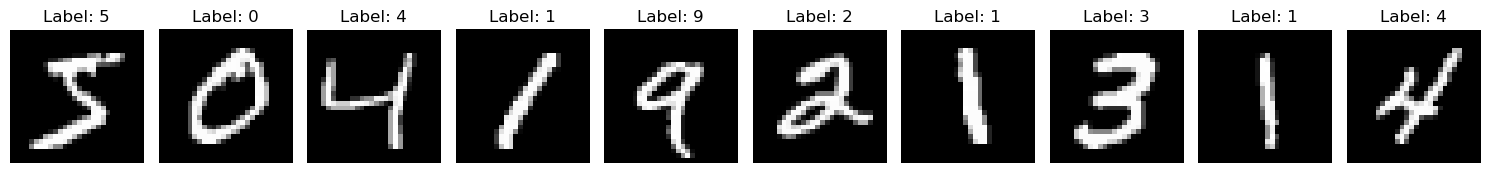

In [10]:
# 첫 10개 이미지 시각화
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 데이터 정규화

- 이미지 픽셀 값을 0.0 ~ 1.0 범위로 변환
- 수학연산이라서 숫자가 크면 중요한 줄 암 => 영향을 많이 미침
- 단위를 0~1사이로 강제로 맞춘다. => 정규화 , 표준화
- 픽셀 값을 0~1사이로 정규화

- astype : 타입변경 4 -> 4.0 / 255
- 이미지를 저장할때 byte단위로 = > 8bit이고 최대값이 255이다 
- 픽셀의 최대값인 255로 나누면 0~1사이의 값이 된다.



In [13]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"정규화 후 x_train 값 범위: {x_train.min()} ~ {x_train.max()}")

정규화 후 x_train 값 범위: 0.0 ~ 0.003921568859368563


## 2. MLP 모델 정의 (tf.keras.Sequential)

MLP는 입력 데이터를 평탄화(Flatten)하는 것이 필수적입니다.

In [16]:
model = tf.keras.Sequential([
    # 입력 형태(28x28)를 지정하고 1차원 벡터(784)로 변환
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    
    # 첫 번째 은닉층: 512개의 노드 (Dense Layer)
    # 512라는 숫자는 최초 만든사람의 마음이였다.
    # 노드 = 뉴런
    # 활성화 함수 = relu
    #   = 신호의 총합을 출력신호로 변환하는 함수
    #   y= w1x1 + w2x2 + w3x3 .... + b
    # 처음에는 시그모이드 함수를 사용함. 
    # 목적 : 출력값을 0~1으로 수렴한 값을 사용
    tf.keras.layers.Dense(512, activation='relu'),
    # Dropout: 과대적합 방지를 위해 30%의 뉴런을 랜덤하게 비활성화

    # Dropout의 효과:
    # 훈련 중에만 작동 (테스트/예측 시에는 자동으로 비활성화)
    # 과대적합을 줄여서 검증/테스트 정확도를 향상시킴
    # 훈련 정확도는 약간 낮아질 수 있지만, 일반화 성능은 개선됨    
    tf.keras.layers.Dropout(0.3),
    
    # 두 번째 은닉층: 256개의 노드 (Dense Layer)
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropout: 과대적합 방지를 위해 20%의 뉴런을 랜덤하게 비활성화
    tf.keras.layers.Dropout(0.2),
    
    # 출력층: 10개의 클래스(0-9)를 위한 Softmax 활성화
    # 출력층에는 Dropout을 사용하지 않음
    # 0~1사이의 확률값으로 표현
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-tr

## 3. 모델 컴파일

- 옵티마이저 , 손실 함수 , 평가 지표 설정를 지정하는 단계
- 딥러닝 계산을 하고 오차를 계산해서 되돌려(역전파)다시 연산을 수행.

### 파라미터  

- adam : 최적화 수단 , 경사하강법
- 손실함수 : sparse_categorical_crossentropy
  - 다중분류일때 사용.
  - 예전에는 입력 데이타를 원핫인코딩 방식으로 변환 했어야 하나 이제는필요없음.
  - 이진분류나 회귀일때는 함수가 바뀐다.

In [18]:

model.compile(optimizer='adam',
              # 손실 함수: 정수형 레이블을 위한 Sparse Categorical Crossentropy
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### 모델 구조 확인

In [19]:
print("--- 모델 요약 ---")
model.summary()
print("------------------")

--- 모델 요약 ---
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 

## 4. 모델 학습 (Training)

history 객체에 학습 과정의 손실 및 정확도 기록

In [22]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=10,  # 학습횟수
    batch_size=128, # 메모리 크기 작을때 이만큼씩 불러와라.
    validation_split=0.1,  # 학습 데이터의 10%를 검증에 사용
    verbose=1
)

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.9624 - val_loss: 0.0925 - val_accuracy: 0.9733
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.9642 - val_loss: 0.0904 - val_accuracy: 0.9740
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1078 - accuracy: 0.9671 - val_loss: 0.0860 - val_accuracy: 0.9765
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9686 - val_loss: 0.0840 - val_accuracy: 0.9748
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9711 - val_loss: 0.0815 - val_accuracy: 0.9773
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9732 - val_loss: 0.0756 - val_accuracy: 0.9790
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9751 - val_loss: 0.0710 - val_accuracy: 0.9797
Epoch 

### 학습 과정 시각화

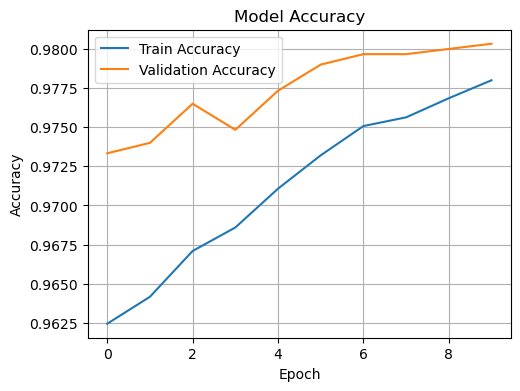

In [26]:
# 정확도 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)



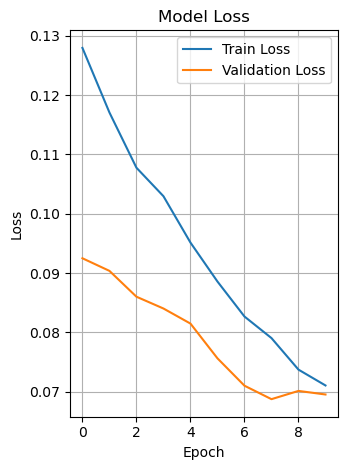

In [27]:
# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. 모델 평가 (Evaluation)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n🎉 테스트 데이터셋 정확도: {test_acc:.4f}')

### 예측 결과 시각화

In [ ]:
# 테스트 데이터에서 예측 수행
predictions = model.predict(x_test[:10])

# 첫 10개 예측 결과 시각화
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"P:{predicted_label}\nT:{true_label}", color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n녹색: 올바른 예측, 빨간색: 잘못된 예측")

### 예측 확률 분석

In [ ]:
# 첫 번째 샘플에 대한 예측 확률
sample_idx = 0
sample_pred = predictions[sample_idx]

print(f"\n샘플 #{sample_idx} 예측 확률:")
print(f"실제 레이블: {y_test[sample_idx]}")
print(f"예측 레이블: {np.argmax(sample_pred)}")
print(f"\n각 클래스별 확률:")
for i, prob in enumerate(sample_pred):
    bar = '█' * int(prob * 50)
    print(f"  숫자 {i}: {prob:.4f} {bar}")